In [1]:
import numpy as np


In [1]:
class AntColony:
 def __init__(self, distances, n_ants, n_best, n_iterations, decay, alpha=1, beta=1):
   
  '''This initializes the AntColony class with necessary parameters.
  distances: Matrix representing distances between cities.
  n_ants: Number of ants to be used in the colony.
  n_best: Number of best paths to use for updating pheromone levels.
  n_iterations: Number of iterations to run the algorithm.
  decay: Rate at which pheromone evaporates.
  alpha and beta: Parameters used to control the relative importance of pheromone and distance, respectively.'''
  self.distances = distances
  self.pheromone = np.ones(self.distances.shape) / len(distances)
  self.all_inds = range(len(distances))
  self.n_ants = n_ants
  self.n_best = n_best
  self.n_iterations = n_iterations
  self.decay = decay
  self.alpha = alpha
  self.beta = beta

  '''This method executes the ant colony optimization algorithm for a specified number of iterations.
  It updates pheromone levels, finds the shortest path, and applies pheromone decay in each iteration.'''
 def run(self):
  shortest_path = None
  shortest_path_length = np.inf
  for i in range(self.n_iterations):
    all_paths = self.gen_all_paths()
    self.spread_pheromone(all_paths, self.n_best, shortest_path, shortest_path_length)
    shortest_path, shortest_path_length = self.get_shortest(all_paths)
    self.pheromone *= self.decay
  return shortest_path, shortest_path_length

  '''This method updates the pheromone levels on paths chosen by the ants.
  It iterates over the best paths found by the ants and increases the pheromone level on each edge.'''
 def spread_pheromone(self, all_paths, n_best, shortest_path, shortest_path_length):
  sorted_paths = sorted(all_paths, key=lambda x: x[1])
  for path, dist in sorted_paths[:n_best]:
      for move in path:
        self.pheromone[move] += 1.0 / self.distances[move]
  '''This method calculates the total distance of a given path by summing up the distances between consecutive cities.'''  
 def gen_path_dist(self, path):
  total_dist = 0
  for ele in path:
    total_dist += self.distances[ele]
  return total_dist

  '''This method generates paths traveled by all ants in the colony.
It iterates over the number of ants, generates a path for each ant starting from the first city, and calculates the distance of each path.'''
 def gen_all_paths(self):
  all_paths = []
  for i in range(self.n_ants):
    path = self.gen_path(0)
    all_paths.append((path, self.gen_path_dist(path)))
  return all_paths

  '''This method generates a path traveled by a single ant.
It iterates over the number of cities, selecting the next city based on pheromone levels and distances.
The ant returns to the starting city after visiting all cities.'''
 def gen_path(self, start):
  path = []
  visited = set()
  visited.add(start)
  prev = start
  for i in range(len(self.distances) - 1):
    move = self.pick_move(self.pheromone[prev], self.distances[prev], visited)
    path.append((prev, move))
    prev = move
    visited.add(move)
    path.append((prev, start)) # going back to where we started
  return path

  '''This method selects the next city (move) for an ant based on pheromone levels and distances.
It calculates the probability of moving to each city based on pheromone levels and distances.
It then randomly selects a city based on these probabilities.'''
 def pick_move(self, pheromone, dist, visited):
  pheromone = np.copy(pheromone)
  pheromone[list(visited)] = 0
  row = pheromone ** self.alpha * ((1.0 / dist) ** self.beta)
  norm_row = row / row.sum()
  move = np.random.choice(self.all_inds, 1, p=norm_row)[0]
  return move
  '''This method finds the shortest path among all paths traveled by the ants.
It iterates over all paths and updates the best path and its length if a shorter path is found.'''
 def get_shortest(self, all_paths):
  best_path = None
  best_path_length = np.inf
  for path, dist in all_paths:
    if dist < best_path_length:
      best_path_length = dist
      best_path = path
  return best_path, best_path_length

'''ACO is a genetic algorithm inspired by an ant’s natural behavior.'''
'''ants use pheromones to find the shortest path between home and food source
pheromones evaporate quickly
ants prefer to use shorter paths with denser pheromone'''

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

if __name__ == '__main__':
    # Define the distance matrix
    distances = np.array([[np.inf, 11, 15, 20],
                          [10, np.inf, 35, 25],
                          [20, 35, np.inf, 30],
                          [25, 25, 30, np.inf]])

    # Initialize the Ant Colony Optimization algorithm
    ant_colony = AntColony(distances, n_ants=3, n_best=2, n_iterations=200, decay=0.5)

    # Run the algorithm
    shortest_path, shortest_path_length = ant_colony.run()

    # Plot the graph
    G = nx.Graph()
    G.add_nodes_from(range(len(distances)))
    for i, j in shortest_path:
        G.add_edge(i, j, weight=distances[i, j])
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=500)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='b')
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): distances[i, j] for i, j in G.edges()}, font_size=10, font_family="sans-serif")
    plt.axis('off')
    plt.show()

    print("Shortest Path:", shortest_path)
    print("Shortest Path Length:", shortest_path_length)




NameError: name 'np' is not defined

In [ ]:
'''Stage 1: All ants are in their nest. There is no pheromone content in the environment. (For algorithmic design, residual pheromone amount can be considered without interfering with the probability)
Stage 2: Ants begin their search with equal (0.5 each) probability along each path. Clearly, the curved path is the longer and hence the time taken by ants to reach food source is greater than the other.
Stage 3: The ants through the shorter path reaches food source earlier. Now, evidently they face with a similar selection dilemma, but this time due to pheromone trail along the shorter path already available, probability of selection is higher.
Stage 4: More ants return via the shorter path and subsequently the pheromone concentrations also increase. Moreover, due to evaporation, the pheromone concentration in the longer path reduces, decreasing the probability of selection of this path in further stages'''


'''  alpha and beta: Parameters used to control the relative importance of pheromone and distance, respectively'''

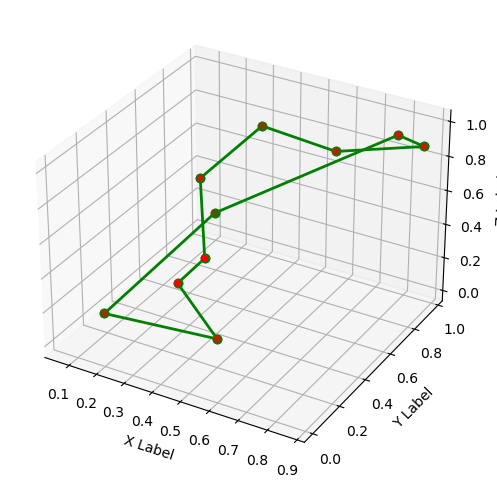

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def ant_colony_optimization(points, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):
    n_points = len(points)
    pheromone = np.ones((n_points, n_points))
    best_path = None
    best_path_length = np.inf
    
    for iteration in range(n_iterations):
        paths = []
        path_lengths = []
        
        for ant in range(n_ants):
            visited = [False]*n_points
            current_point = np.random.randint(n_points)
            visited[current_point] = True
            path = [current_point]
            path_length = 0
            
            while False in visited:
                unvisited = np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisited))
                
                for i, unvisited_point in enumerate(unvisited):
                    probabilities[i] = pheromone[current_point, unvisited_point]**alpha / distance(points[current_point], points[unvisited_point])**beta
                
                probabilities /= np.sum(probabilities)
                
                next_point = np.random.choice(unvisited, p=probabilities)
                path.append(next_point)
                path_length += distance(points[current_point], points[next_point])
                visited[next_point] = True
                current_point = next_point
            
            paths.append(path)
            path_lengths.append(path_length)
            
            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length
        
        pheromone *= evaporation_rate
        
        for path, path_length in zip(paths, path_lengths):
            for i in range(n_points-1):
                pheromone[path[i], path[i+1]] += Q/path_length
            pheromone[path[-1], path[0]] += Q/path_length
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2], c='r', marker='o')
    
    for i in range(n_points-1):
        ax.plot([points[best_path[i],0], points[best_path[i+1],0]],
                [points[best_path[i],1], points[best_path[i+1],1]],
                [points[best_path[i],2], points[best_path[i+1],2]],
                c='g', linestyle='-', linewidth=2, marker='o')
        
    ax.plot([points[best_path[0],0], points[best_path[-1],0]],
            [points[best_path[0],1], points[best_path[-1],1]],
            [points[best_path[0],2], points[best_path[-1],2]],
            c='g', linestyle='-', linewidth=2, marker='o')
    
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    plt.show()
    
# Example usage:
points = np.random.rand(10, 3) # Generate 10 random 3D points
ant_colony_optimization(points, n_ants=10, n_iterations=100, alpha=1, beta=1, evaporation_rate=0.5, Q=1)